In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [35]:
df = pd.read_csv("data.csv")
df.columns.to_list()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

# Features
- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower's creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower's creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    - Y: The individual has a history of defaults on their credit file.
    - N: The individual does not have any history of defaults.
- cb_person_cred_hist_length: The length of credit history for the individual.

## Hypothesis
• Given a factors, is it possible to predict if an individual will default on their credit?
aka target = loan_status

Extension: what are the features that influence whether someone will default?


In [36]:
# Do EDA to understand the data
df.describe()
# have to clean person_age, person_emp_length, loan_pct_income = 0?

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##  Check for null values and duplicates

There are null values - we either handle them by deletion or imputation later.
As for duplicated rows they can be removed first.

In [37]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [38]:
print(df.duplicated().sum())
df = df.drop_duplicates()

165


loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64


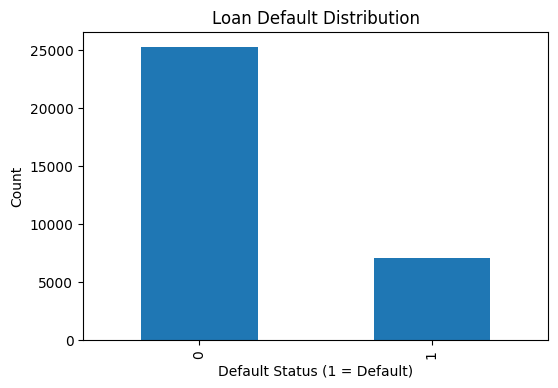

In [39]:
print(df["loan_status"].value_counts(normalize=True))
# 21% of the loans are defaulted
plt.figure(figsize=(6, 4))
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Default Distribution")
plt.xlabel("Default Status (1 = Default)")
plt.ylabel("Count")
plt.show()

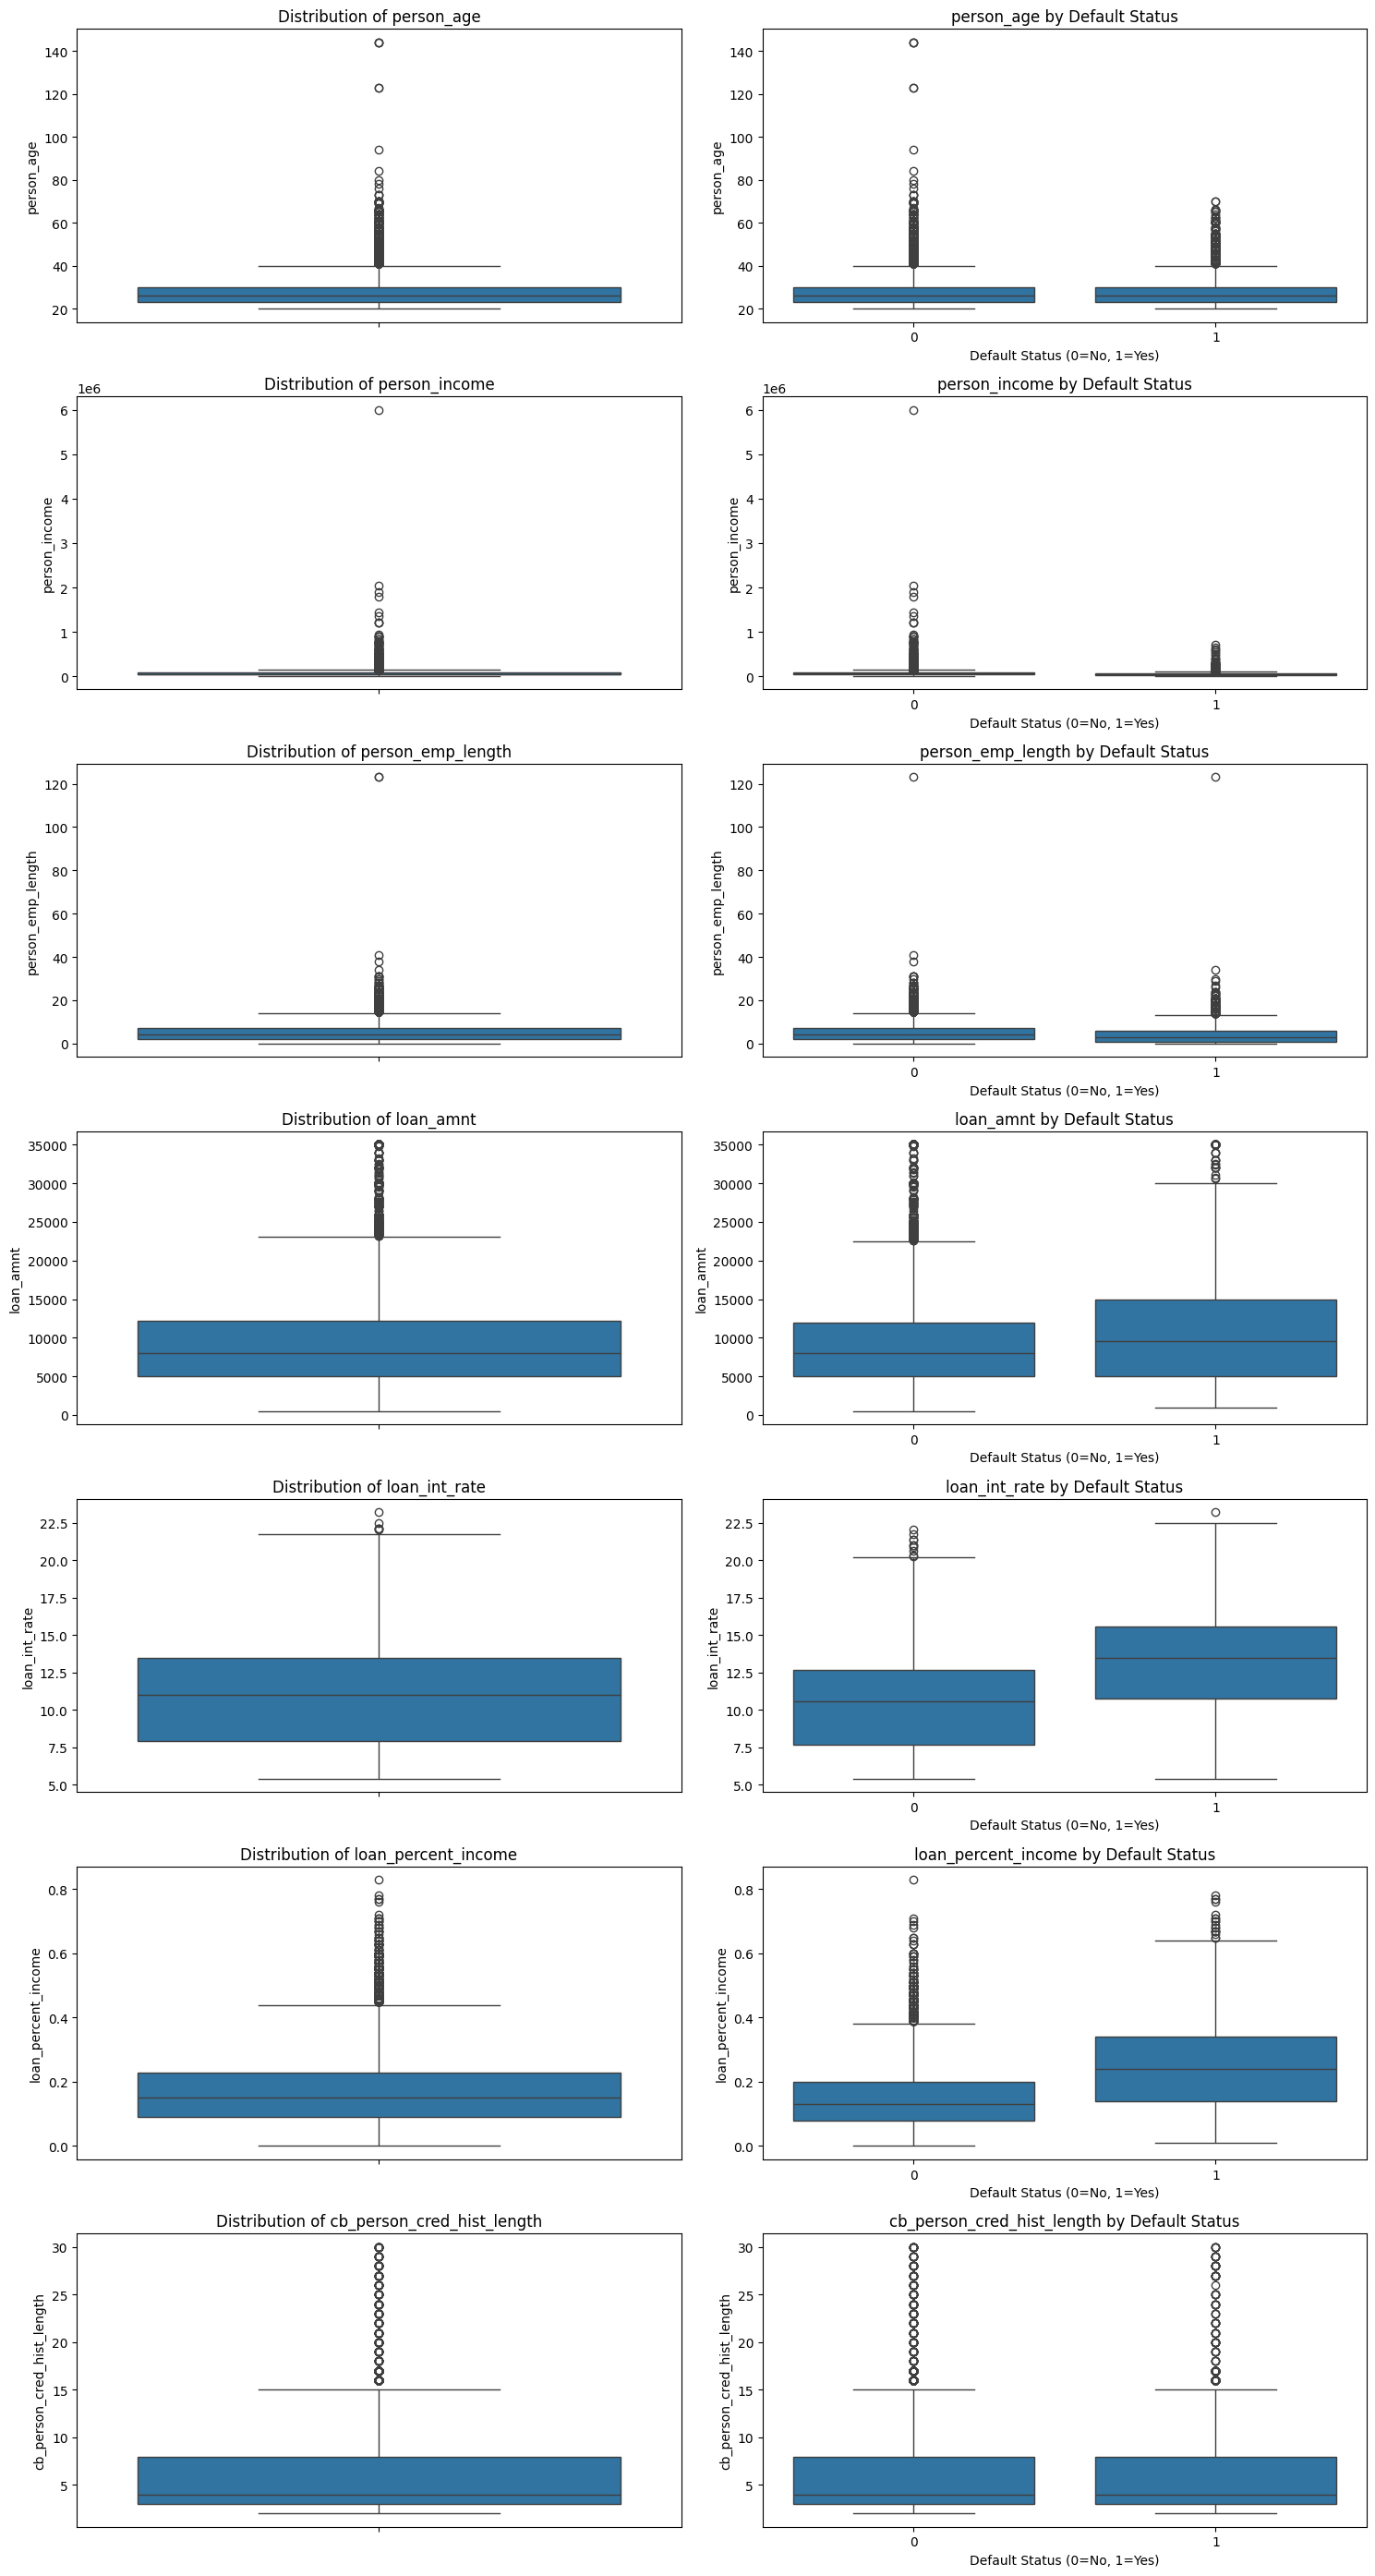

In [40]:
"""
'person_age', - Numerical
 'person_income', - Numerical
 'person_home_ownership', - Categorical
 'person_emp_length',   - Numerical
 'loan_intent', - Categorical
 'loan_grade', - Categorical
 'loan_amnt', - Numerical
 'loan_int_rate', - Numerical
 'loan_status', - Target
 'loan_percent_income',- Numerical
 'cb_person_default_on_file',- Categorical
 'cb_person_cred_hist_length'"- Numerical
"""

# Numerical features
num_features = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 4 * len(num_features)))
for i, feature in enumerate(num_features):
    # Box plot for overall distribution
    sns.boxplot(y=df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    axes[i, 0].set_ylabel(feature)

    # Boxplot by target
    sns.boxplot(x="loan_status", y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f"{feature} by Default Status")
    axes[i, 1].set_xlabel("Default Status (0=No, 1=Yes)")
    axes[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

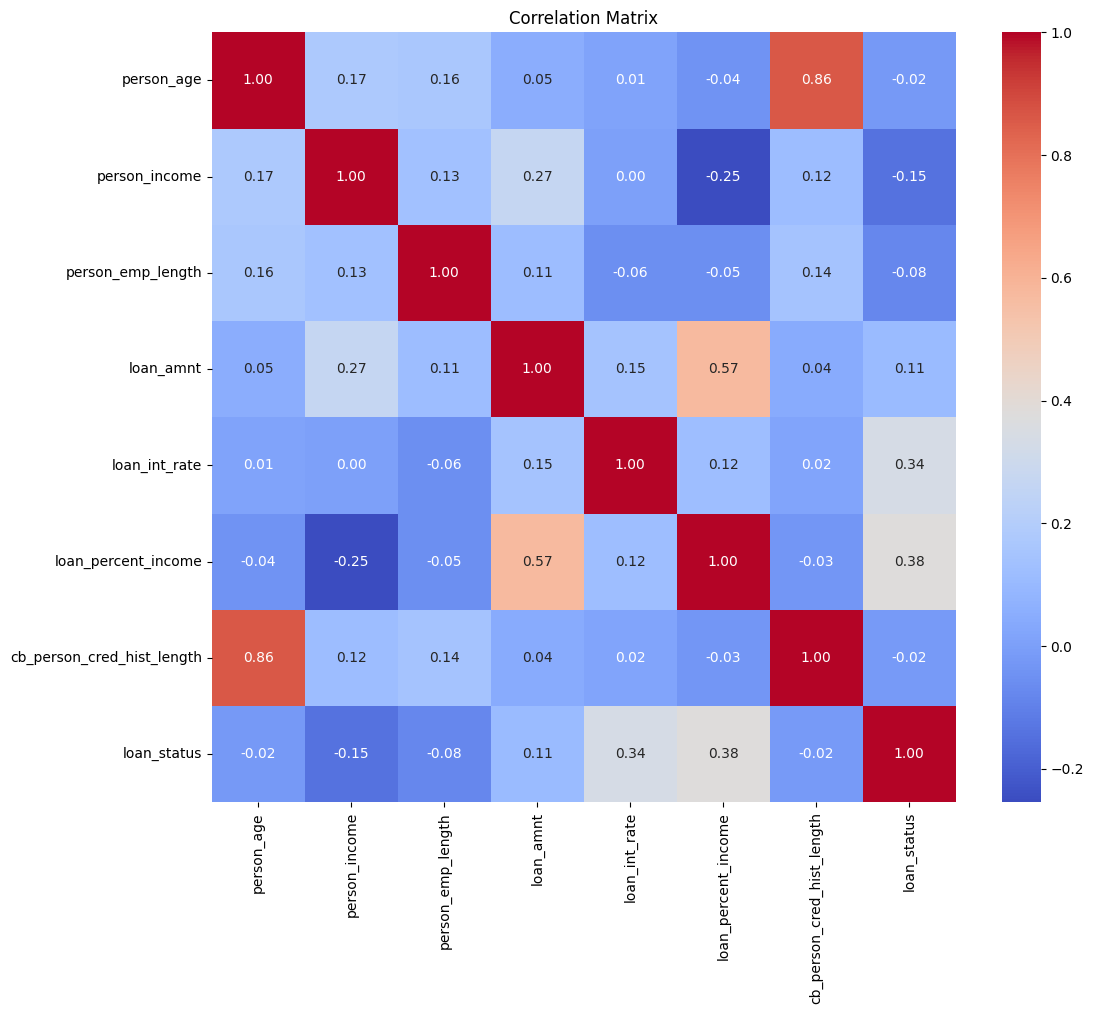

In [41]:
plt.figure(figsize=(12, 10))
corr = df[num_features + ["loan_status"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


INSIGHTS:
We thought person_age and person_employment_length would've had a higher correlation, since age and credit history length has a very strong correlation. We investigate this below.

The higher the income, the lower the loan expressed as % of income.
The higher the income, the higher the loan amount might be

The higher the loan amount, the higher they were as % of income, i.e. people with lower income take loans that result in higher leverage (to buy big ticket items)

Interest rates show almost no correlation to loan profile which is true in practice since they are driven by mkt forces

Of special interest to us, loan status (last row) has **highest correlation magnitude with  loan_perent_income and loan_int_rate and person_income.**

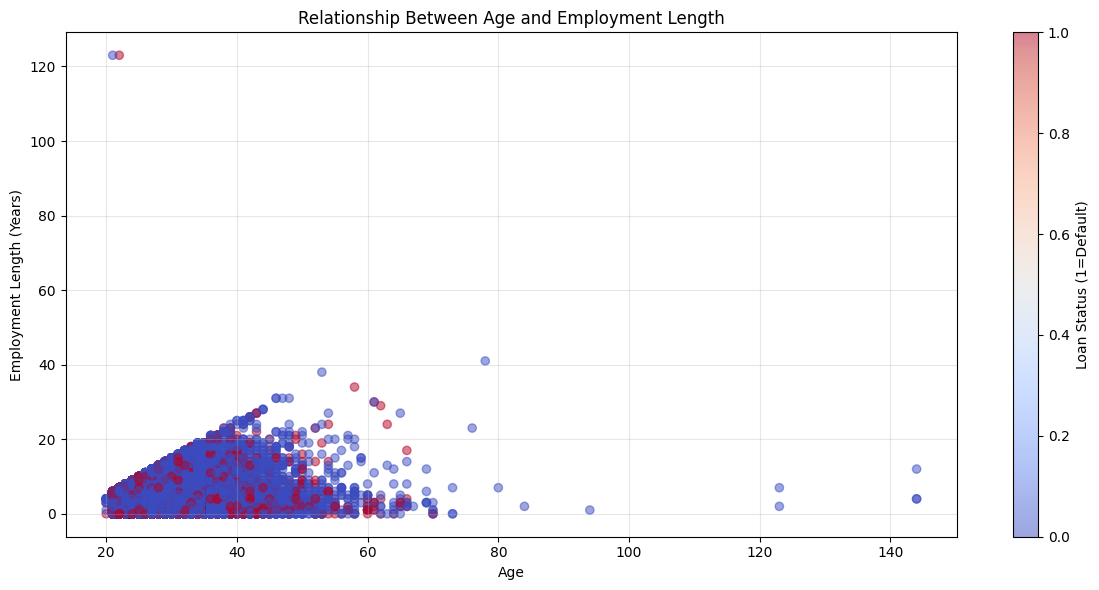

In [42]:
# Visualize relationship between age and employment length


# Scatter plot with color by loan status, turned into function since it will be called a few more times
def drawGraph(df):
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(
        df["person_age"],
        df["person_emp_length"],
        c=df["loan_status"],
        alpha=0.5,
        cmap="coolwarm",
    )

    plt.colorbar(scatter, label="Loan Status (1=Default)")
    plt.xlabel("Age")
    plt.ylabel("Employment Length (Years)")
    plt.title("Relationship Between Age and Employment Length")

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


drawGraph(df)

## Anomaly Cleaning:

It seemed weird that the correlation between employment length is so weak, so we visualized it. As expected, the correlation is affected by the presence of anomlous data at the top right.
Upon closer examination, having an employment length exceeding age is also anomalous, so we removed that as well. This allows our data to fall within a much more reasonable spread.

<Figure size 1200x600 with 0 Axes>

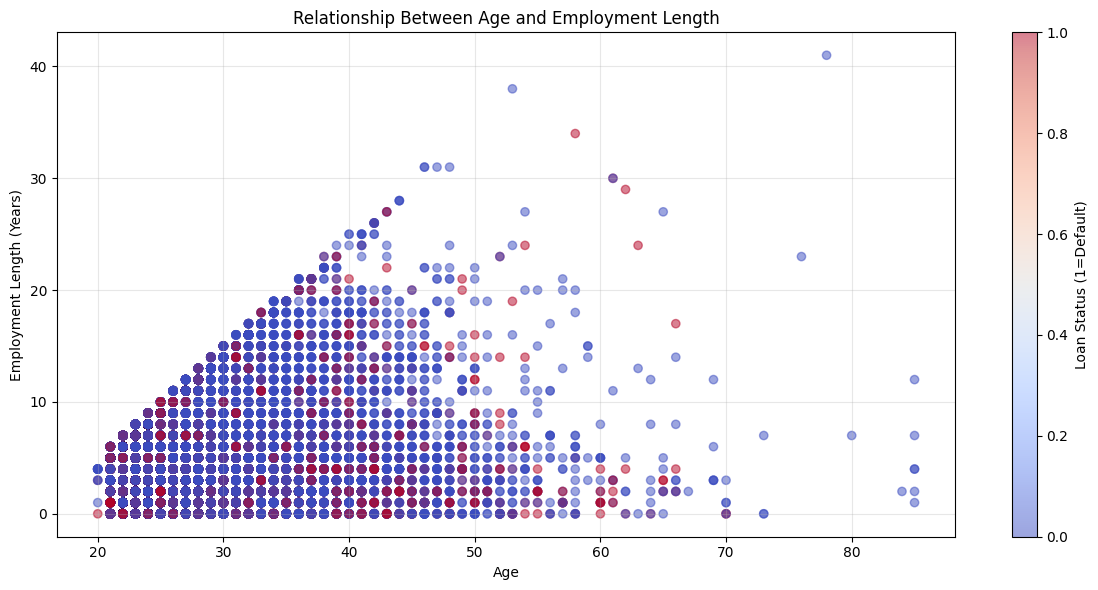

In [43]:
# Remove outliers
df["person_emp_length"] = df["person_emp_length"].clip(upper=45)
df["person_age"] = df["person_age"].clip(upper=85)
plt.figure(figsize=(12, 6))

# Remove outliers
df = df[df["person_emp_length"] < df["person_age"]]

drawGraph(df)

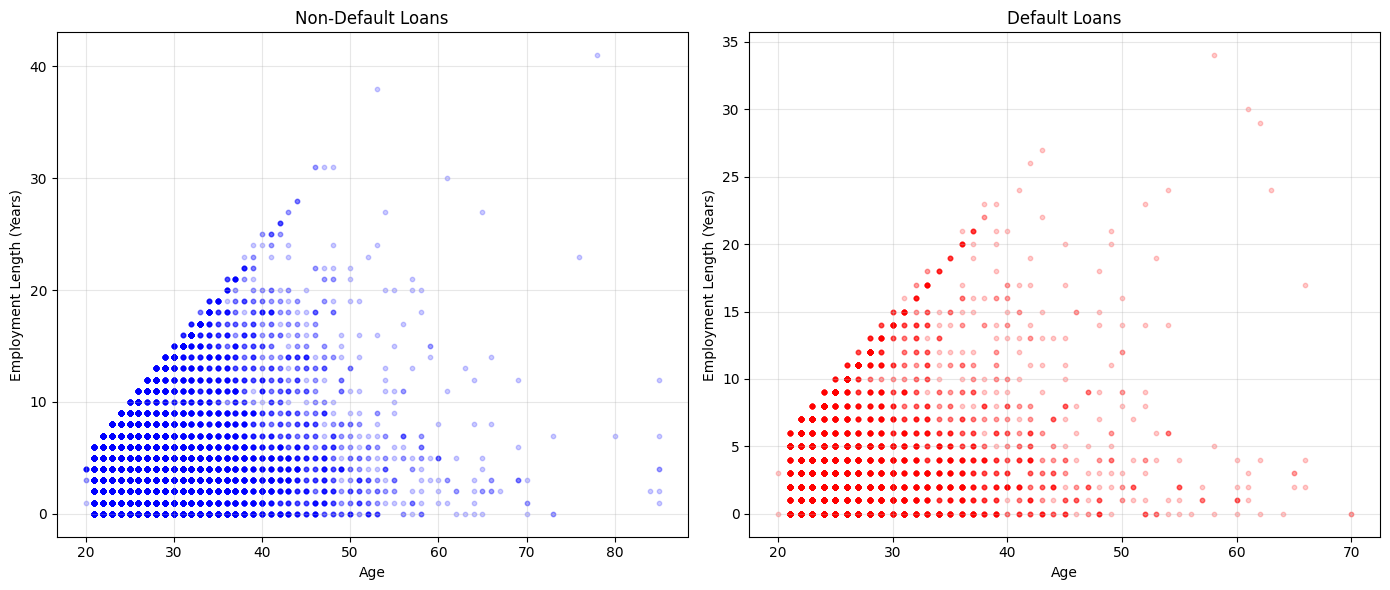

In [44]:
# Visualize the distribution of the two features in default VS non-default loans
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    df[df["loan_status"] == 0]["person_age"],
    df[df["loan_status"] == 0]["person_emp_length"],
    alpha=0.2,
    color="blue",
    s=10,
)
plt.xlabel("Age")
plt.ylabel("Employment Length (Years)")
plt.title("Non-Default Loans")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(
    df[df["loan_status"] == 1]["person_age"],
    df[df["loan_status"] == 1]["person_emp_length"],
    alpha=0.2,
    color="red",
    s=10,
)
plt.xlabel("Age")
plt.ylabel("Employment Length (Years)")
plt.title("Default Loans")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

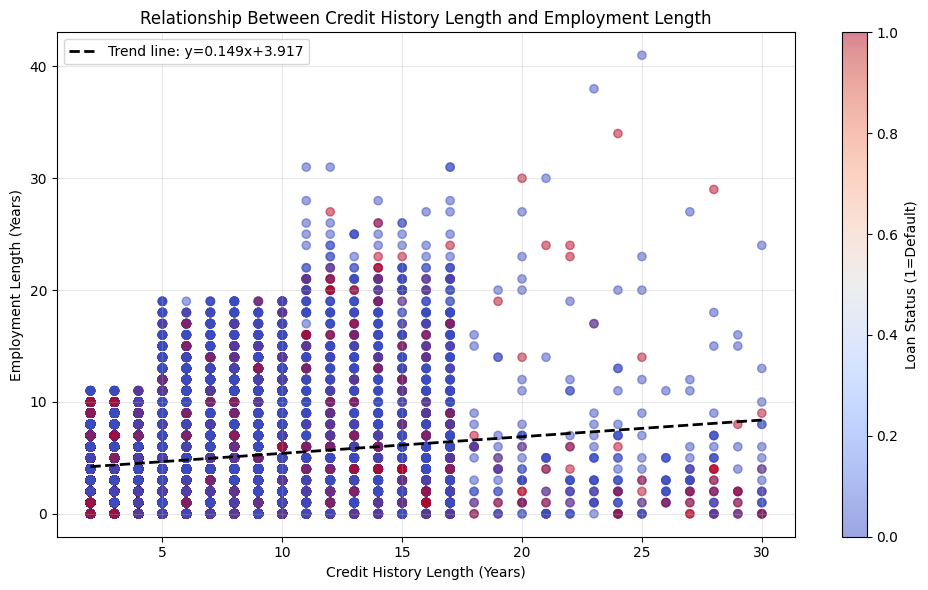

In [45]:
# Visualize the relationship between credit history length and employment length
plt.figure(figsize=(10, 6))

# Create scatter plot with color by loan status
scatter = plt.scatter(
    df["cb_person_cred_hist_length"],
    df["person_emp_length"],
    c=df["loan_status"],
    alpha=0.5,
    cmap="coolwarm",
)

# Add regression line
z = np.polyfit(df["cb_person_cred_hist_length"], df["person_emp_length"], 1)
p = np.poly1d(z)
plt.plot(
    df["cb_person_cred_hist_length"],
    p(df["cb_person_cred_hist_length"]),
    "k--",
    linewidth=2,
    label=f"Trend line: y={z[0]:.3f}x+{z[1]:.3f}",
)

plt.colorbar(scatter, label="Loan Status (1=Default)")
plt.xlabel("Credit History Length (Years)")
plt.ylabel("Employment Length (Years)")
plt.title("Relationship Between Credit History Length and Employment Length")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Number of people with credit history longer than employment: 16333 (51.81% of total)


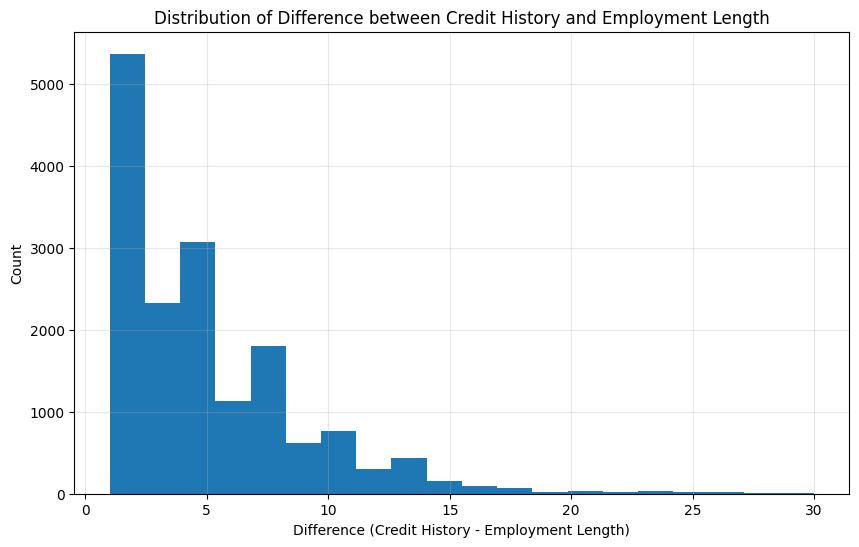

In [46]:
credit_longer_than_employment = df[
    df["cb_person_cred_hist_length"] > df["person_emp_length"]
].copy()

percentage = (len(credit_longer_than_employment) / len(df)) * 100

print(
    f"Number of people with credit history longer than employment: {len(credit_longer_than_employment)} ({percentage:.2f}% of total)"
)

credit_longer_than_employment["history_employment_diff"] = (
    credit_longer_than_employment["cb_person_cred_hist_length"]
    - credit_longer_than_employment["person_emp_length"]
)

plt.figure(figsize=(10, 6))
plt.hist(credit_longer_than_employment["history_employment_diff"], bins=20)
plt.title("Distribution of Difference between Credit History and Employment Length")
plt.xlabel("Difference (Credit History - Employment Length)")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

As you can see - too much of our data exhibits this peculiar behavior. Either there's some part of how credit history works in the US that we're not understanding, or that this synthetic dataset simply didn't model this relationship enough during generation. Either way, we decided to leave it as is.

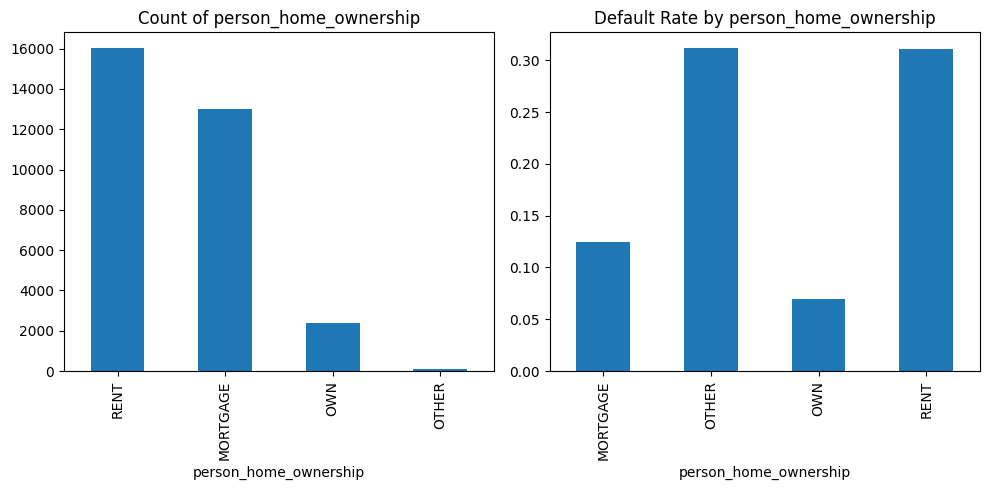

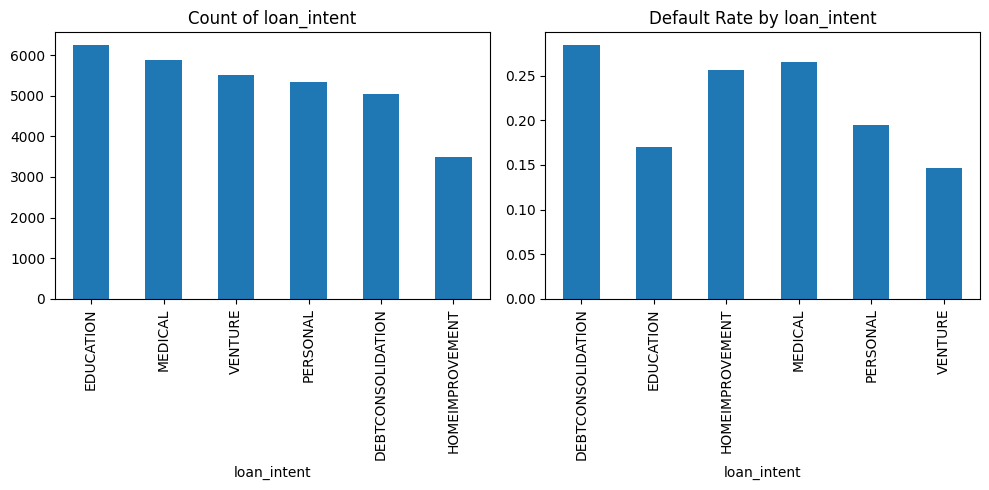

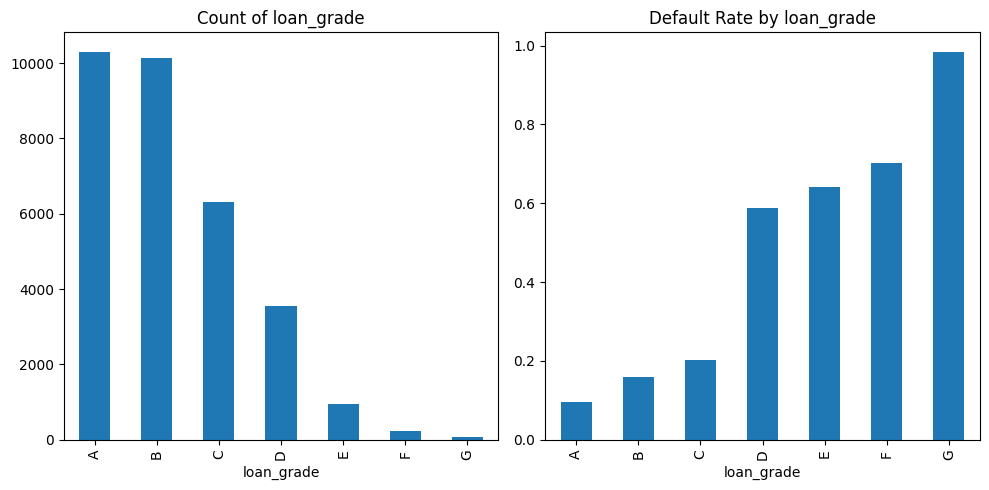

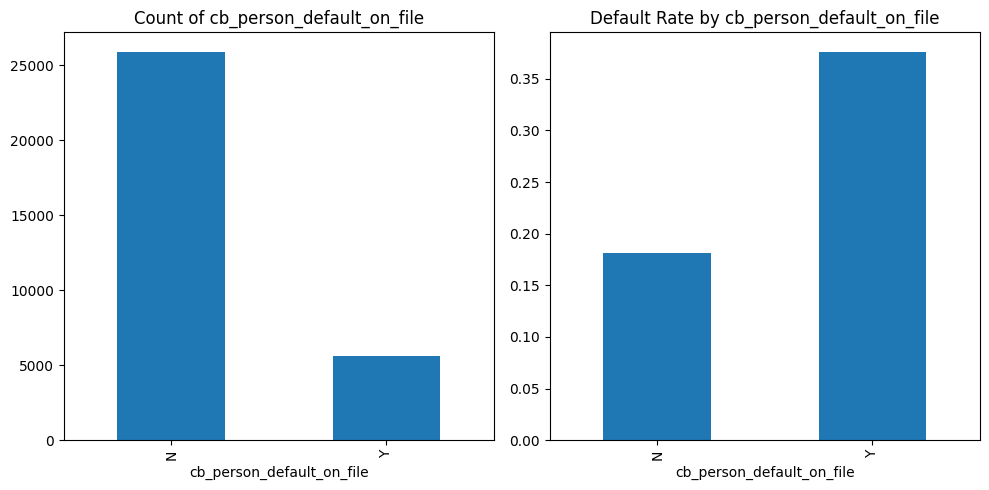

In [47]:
# categorical features visualization
cat_features = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file",
]

for feature in cat_features:
    plt.figure(figsize=(10, 5))

    # Count by category
    plt.subplot(1, 2, 1)
    df[feature].value_counts().plot(kind="bar")
    plt.title(f"Count of {feature}")

    # Default rate by category
    plt.subplot(1, 2, 2)
    df.groupby(feature)["loan_status"].mean().plot(kind="bar")
    plt.title(f"Default Rate by {feature}")
    plt.tight_layout()
    plt.show()

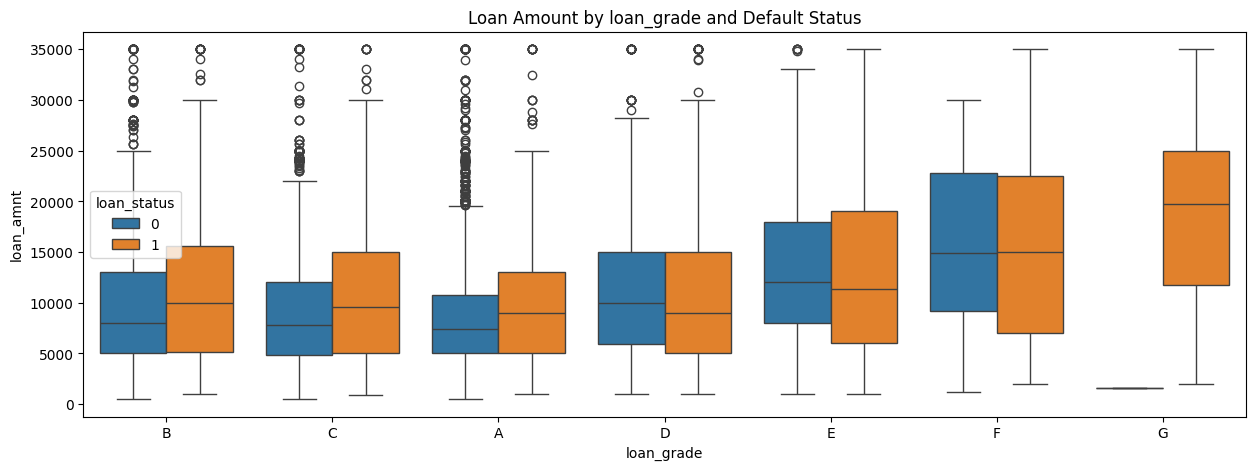

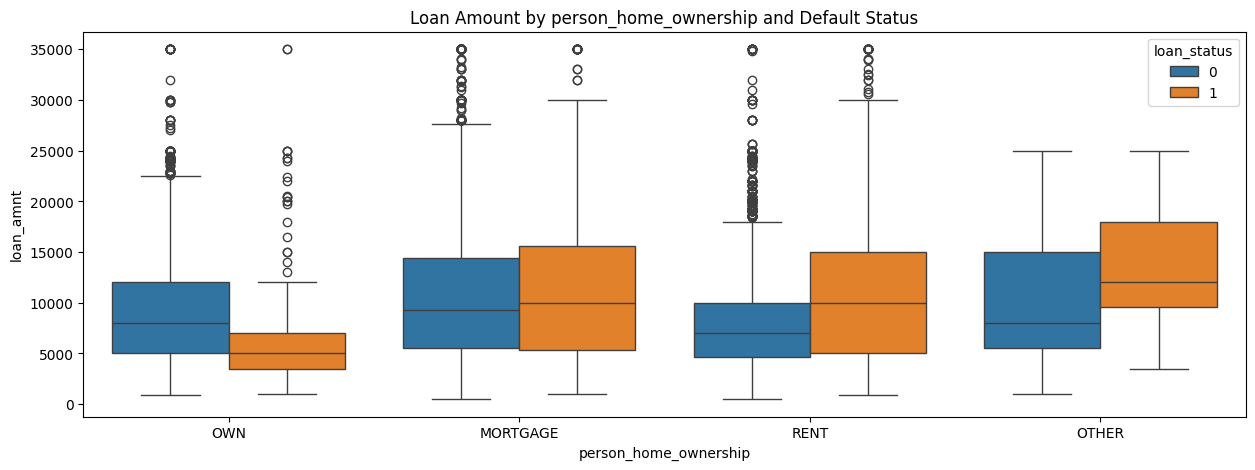

In [48]:
# For key categorical variables, analyze numerical features by category
for cat in ["loan_grade", "person_home_ownership"]:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=cat, y="loan_amnt", hue="loan_status", data=df)
    plt.title(f"Loan Amount by {cat} and Default Status")
    plt.show()

# Data Preprocessing

Principally, categorical labels need to be encoded into numerical ones.

We also investigate two strategies --> impute missing data VS delete missing data records

One thing that stood out was how home ownership type = OTHER had a high 30% default rate.
There are a few strategies:
1) Treat as RENT on the basis that their default rates are almost the same
2) Delete the record entirely
3) Do nothing

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# https://contrib.scikit-learn.org/category_encoders/
# other encoders we can try:
import category_encoders as ce

In [50]:
encoder = ce.OneHotEncoder(
    cols=cat_features,
    return_df=True,
    use_cat_names=True,
)

df = encoder.fit_transform(df)
df

,person_age,person_income,person_home_ownership_OWN,person_home_ownership_MORTGAGE,person_home_ownership_RENT,person_home_ownership_OTHER,person_emp_length,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,...,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file_N,cb_person_default_on_file_Y,cb_person_cred_hist_length
1,21,9600,1,0,0,0,5.0,1,0,0,...,0,0,0,1000,11.14,0,0.10,1,0,2
2,25,9600,0,1,0,0,1.0,0,1,0,...,0,0,0,5500,12.87,1,0.57,1,0,3
3,23,65500,0,0,1,0,4.0,0,1,0,...,0,0,0,35000,15.23,1,0.53,1,0,2
4,24,54400,0,0,1,0,8.0,0,1,0,...,0,0,0,35000,14.27,1,0.55,0,1,4
5,21,9900,1,0,0,0,2.0,0,0,1,...,0,0,0,2500,7.14,1,0.25,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1,0,0,1.0,0,0,0,...,0,0,0,5800,13.16,0,0.11,1,0,30
32577,54,120000,0,1,0,0,4.0,0,0,0,...,0,0,0,17625,7.49,0,0.15,1,0,19
32578,65,76000,0,0,1,0,3.0,0,0,0,...,0,0,0,35000,10.99,1,0.46,1,0,28
32579,56,150000,0,1,0,0,5.0,0,0,0,...,0,0,0,15000,11.48,0,0.10,1,0,26


# Approach 1: Data Imputation
Based on checking the null values from above, the data that needs to be imputed are all numerical (person_emp_length and interest_rate).

In [51]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [52]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
# Standardize numerical features with StandardScaler
# Scale numerical features
scaler = StandardScaler()
numerical_cols = [
    col
    for col in X_train.columns
    if X_train[col].dtype in ["int64", "float64"]
    and "person_home_ownership_" != col  # these are all categorical
    and "loan_intent_" != col
    and "loan_grade_" != col
    and "cb_person_default_on_file_" != col
]

In [54]:
# Get the names of columns with missing values
columns_with_nulls = X_train.columns[X_train.isnull().any()].tolist()

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy="mean")

# Create a copy to avoid modifying the original
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()


# Impute missing values
X_train_imputed[columns_with_nulls] = numerical_imputer.fit_transform(
    X_train[columns_with_nulls]
)
X_test_imputed[columns_with_nulls] = numerical_imputer.transform(
    X_test[columns_with_nulls]
)


X_train_imputed[numerical_cols] = scaler.fit_transform(X_train_imputed[numerical_cols])
X_test_imputed[numerical_cols] = scaler.transform(X_test_imputed[numerical_cols])

print(f"Training data shape: {X_train_imputed.shape}")
print(f"Testing data shape: {X_test_imputed.shape}")
print(f"Number of features: {X_train_imputed.shape[1]}")

Training data shape: (25221, 26)
Testing data shape: (6306, 26)
Number of features: 26


## Approach 2 (Our Actual Approach):
Doing data imputation requires us to split the data first (so that information of the mean doesn't leak across sets).

However, a different approach is to just drop the rows where there are null values present.

To keep things simple, we opted to continue the notebook by using the deletion method over imputation. (We did not use the data imputed above). We thus continue our analysis below using this simplistic method.

# Introducing Pycaret

PyCaret is a framework that allows us to test the dataset against different kinds of classifiers out there. It is considered an auto-ML framework in that once we have our dataset prepared properly, it basically does everything else for us.

In [55]:
from pycaret.classification import *

model = setup(data=df, target="loan_status")

,Description,Value
0,Session id,8770
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(31527, 27)"
4,Transformed data shape,"(31527, 27)"
5,Transformed train set shape,"(22068, 27)"
6,Transformed test set shape,"(9459, 27)"
7,Numeric features,26
8,Rows with missing values,9.6%
9,Preprocess,True


PyCaret is an AutoML framework that uses a collection of different classifiers to see which performs the best. We use this as a reference for what we should expect to get with our own implementations.

In [56]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9371,0.9468,0.7274,0.9750,0.8329,0.7952,0.8083,0.5110
xgboost,Extreme Gradient Boosting,0.9366,0.9489,0.7434,0.9528,0.8348,0.7964,0.8060,0.0430
rf,Random Forest Classifier,0.9346,0.9302,0.7198,0.9696,0.8259,0.7868,0.8002,0.2210
gbc,Gradient Boosting Classifier,0.9280,0.9278,0.7110,0.9415,0.8098,0.7665,0.7782,0.2700
et,Extra Trees Classifier,0.9205,0.9134,0.6861,0.9265,0.7881,0.7405,0.7533,0.1880
dt,Decision Tree Classifier,0.8893,0.8446,0.7660,0.7331,0.7490,0.6780,0.6784,0.0250
ada,Ada Boost Classifier,0.8866,0.8989,0.6447,0.7916,0.7104,0.6408,0.6462,0.0810
lda,Linear Discriminant Analysis,0.8655,0.8689,0.5883,0.7361,0.6537,0.5715,0.5772,0.0130
ridge,Ridge Classifier,0.8610,0.8688,0.5190,0.7614,0.6169,0.5358,0.5506,0.0100
lr,Logistic Regression,0.8537,0.8563,0.4701,0.7611,0.5810,0.4983,0.5197,0.5150


In [57]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [58]:
from sklearn.decomposition import PCA

scaler = StandardScaler()

df_clean = df.dropna()
scaled_data = scaler.fit_transform(df_clean)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

# Show explained variance
print(pca.explained_variance_ratio_)

[0.13189015 0.08532481]


In [59]:
print(pca_df)

            PC1       PC2
0     -0.957522 -1.430459
1      1.319681 -0.939564
2      2.541408 -1.666157
3      4.579694 -0.319884
4     -1.133638 -1.694136
...         ...       ...
28494 -0.046952  4.685323
28495 -2.069325  4.001129
28496  0.890104  2.914141
28497 -1.179385  4.666782
28498 -0.598310  2.517073

[28499 rows x 2 columns]


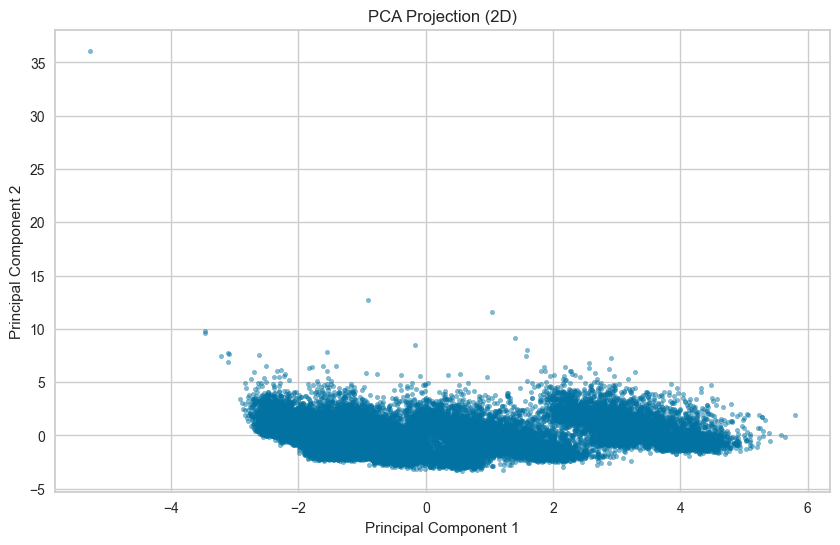

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.5, s=10)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [61]:
df_clean = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3"])

# Show explained variance
print(pca.explained_variance_ratio_)

[0.13188918 0.08530775 0.07152489]


Low explained variance for each Principal Components suggests that most of the important variation is spread out across more components (data is likely high-dimensional and complex), meaning we have to keep more features for a good model
Also means that linear models will likely struggle

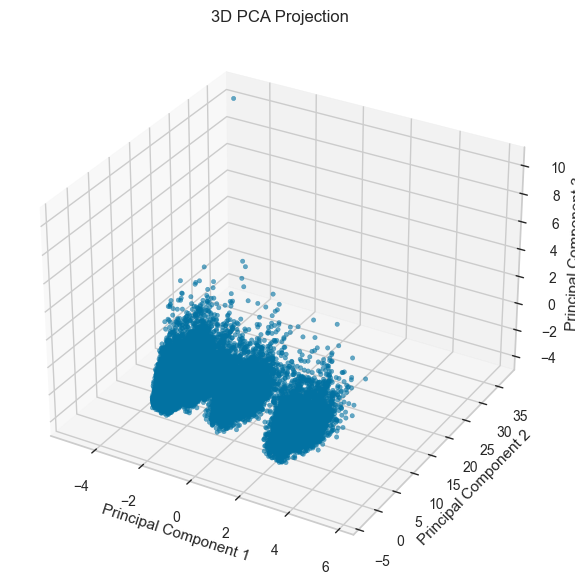

In [62]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], alpha=0.6, s=10)

ax.set_title("3D PCA Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

Visually it appears that there are 3 distinct clusters

Since data is highly complex, try Neural Network which can effectively capture non linear relationships

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

In [33]:
df_cleaned = df.dropna()
X = df_cleaned.drop("loan_status", axis=1).to_numpy(dtype=np.float32)
y = df_cleaned["loan_status"].to_numpy(dtype=np.float32).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [64]:
assert not torch.isnan(X_train_tensor).any(), "NaNs in training data"
assert not torch.isnan(y_train_tensor).any(), "NaNs in training labels"

Below are our trial and error attempts at modifying the neural network to produce better results. We produce models that demonstrate about 92-93% accuracy on the held out test set.

In [65]:
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.7343
Epoch [20/1000], Loss: 0.7040
Epoch [30/1000], Loss: 0.6732
Epoch [40/1000], Loss: 0.6385
Epoch [50/1000], Loss: 0.5990
Epoch [60/1000], Loss: 0.5561
Epoch [70/1000], Loss: 0.5131
Epoch [80/1000], Loss: 0.4739
Epoch [90/1000], Loss: 0.4405
Epoch [100/1000], Loss: 0.4127
Epoch [110/1000], Loss: 0.3897
Epoch [120/1000], Loss: 0.3708
Epoch [130/1000], Loss: 0.3552
Epoch [140/1000], Loss: 0.3423
Epoch [150/1000], Loss: 0.3317
Epoch [160/1000], Loss: 0.3229
Epoch [170/1000], Loss: 0.3156
Epoch [180/1000], Loss: 0.3093
Epoch [190/1000], Loss: 0.3039
Epoch [200/1000], Loss: 0.2989
Epoch [210/1000], Loss: 0.2945
Epoch [220/1000], Loss: 0.2904
Epoch [230/1000], Loss: 0.2867
Epoch [240/1000], Loss: 0.2833
Epoch [250/1000], Loss: 0.2803
Epoch [260/1000], Loss: 0.2775
Epoch [270/1000], Loss: 0.2749
Epoch [280/1000], Loss: 0.2725
Epoch [290/1000], Loss: 0.2702
Epoch [300/1000], Loss: 0.2680
Epoch [310/1000], Loss: 0.2660
Epoch [320/1000], Loss: 0.2639
Epoch [330/1000],

Large difference between train and test accuracy implies overfitting

Add dropout to reduce overfitting

In [67]:
first_layer_neurons = 128


# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.5418
Epoch [20/1000], Loss: 0.4720
Epoch [30/1000], Loss: 0.4164
Epoch [40/1000], Loss: 0.3817
Epoch [50/1000], Loss: 0.3580
Epoch [60/1000], Loss: 0.3433
Epoch [70/1000], Loss: 0.3306
Epoch [80/1000], Loss: 0.3196
Epoch [90/1000], Loss: 0.3132
Epoch [100/1000], Loss: 0.3054
Epoch [110/1000], Loss: 0.3020
Epoch [120/1000], Loss: 0.2948
Epoch [130/1000], Loss: 0.2926
Epoch [140/1000], Loss: 0.2873
Epoch [150/1000], Loss: 0.2851
Epoch [160/1000], Loss: 0.2810
Epoch [170/1000], Loss: 0.2807
Epoch [180/1000], Loss: 0.2787
Epoch [190/1000], Loss: 0.2717
Epoch [200/1000], Loss: 0.2703
Epoch [210/1000], Loss: 0.2680
Epoch [220/1000], Loss: 0.2659
Epoch [230/1000], Loss: 0.2616
Epoch [240/1000], Loss: 0.2607
Epoch [250/1000], Loss: 0.2596
Epoch [260/1000], Loss: 0.2572
Epoch [270/1000], Loss: 0.2560
Epoch [280/1000], Loss: 0.2547
Epoch [290/1000], Loss: 0.2538
Epoch [300/1000], Loss: 0.2521
Epoch [310/1000], Loss: 0.2489
Epoch [320/1000], Loss: 0.2507
Epoch [330/1000],

As expected, test accuracy increased

We can try to improve the overall accuracy by adding more layers

Try lesser epochs to reduce overfitting

In [68]:
first_layer_neurons = 1024


# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, first_layer_neurons // 4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons // 4, first_layer_neurons // 8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons // 8, 1)
        self.relu5 = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/200], Loss: 0.4419
Epoch [20/200], Loss: 0.3765
Epoch [30/200], Loss: 0.3497
Epoch [40/200], Loss: 0.3111
Epoch [50/200], Loss: 0.2821
Epoch [60/200], Loss: 0.2672
Epoch [70/200], Loss: 0.2559
Epoch [80/200], Loss: 0.2486
Epoch [90/200], Loss: 0.2402
Epoch [100/200], Loss: 0.2354
Epoch [110/200], Loss: 0.2279
Epoch [120/200], Loss: 0.2242
Epoch [130/200], Loss: 0.2212
Epoch [140/200], Loss: 0.2185
Epoch [150/200], Loss: 0.2163
Epoch [160/200], Loss: 0.2135
Epoch [170/200], Loss: 0.2103
Epoch [180/200], Loss: 0.2071
Epoch [190/200], Loss: 0.2045
Epoch [200/200], Loss: 0.2016

Train Accuracy: 0.9377

Test Accuracy: 0.9261


Change from sigmoid to BCEWithLogitsLoss which is more stable by avoiding issues with vanishing gradients

In [69]:
first_layer_neurons = 1024


# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, first_layer_neurons // 4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons // 4, first_layer_neurons // 8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons // 8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/200], Loss: 0.4184
Epoch [20/200], Loss: 0.3683
Epoch [30/200], Loss: 0.3243
Epoch [40/200], Loss: 0.2886
Epoch [50/200], Loss: 0.2697
Epoch [60/200], Loss: 0.2587
Epoch [70/200], Loss: 0.2490
Epoch [80/200], Loss: 0.2401
Epoch [90/200], Loss: 0.2343
Epoch [100/200], Loss: 0.2290
Epoch [110/200], Loss: 0.2245
Epoch [120/200], Loss: 0.2199
Epoch [130/200], Loss: 0.2194
Epoch [140/200], Loss: 0.2144
Epoch [150/200], Loss: 0.2093
Epoch [160/200], Loss: 0.2088
Epoch [170/200], Loss: 0.2046
Epoch [180/200], Loss: 0.2043
Epoch [190/200], Loss: 0.2024
Epoch [200/200], Loss: 0.1972

Train Accuracy: 0.9375

Test Accuracy: 0.9219


Increase epoch to reduce bias and add weight decay (L2 regularization) to reduce variance/overfitting

In [70]:
first_layer_neurons = 1024


# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, first_layer_neurons // 4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons // 4, first_layer_neurons // 8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons // 8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.4348
Epoch [20/500], Loss: 0.3690
Epoch [30/500], Loss: 0.3272
Epoch [40/500], Loss: 0.2910
Epoch [50/500], Loss: 0.2707
Epoch [60/500], Loss: 0.2592
Epoch [70/500], Loss: 0.2503
Epoch [80/500], Loss: 0.2440
Epoch [90/500], Loss: 0.2366
Epoch [100/500], Loss: 0.2317
Epoch [110/500], Loss: 0.2266
Epoch [120/500], Loss: 0.2222
Epoch [130/500], Loss: 0.2213
Epoch [140/500], Loss: 0.2168
Epoch [150/500], Loss: 0.2131
Epoch [160/500], Loss: 0.2107
Epoch [170/500], Loss: 0.2066
Epoch [180/500], Loss: 0.2060
Epoch [190/500], Loss: 0.2020
Epoch [200/500], Loss: 0.1994
Epoch [210/500], Loss: 0.1970
Epoch [220/500], Loss: 0.1955
Epoch [230/500], Loss: 0.1951
Epoch [240/500], Loss: 0.1949
Epoch [250/500], Loss: 0.1877
Epoch [260/500], Loss: 0.1876
Epoch [270/500], Loss: 0.1858
Epoch [280/500], Loss: 0.1838
Epoch [290/500], Loss: 0.1789
Epoch [300/500], Loss: 0.1768
Epoch [310/500], Loss: 0.1767
Epoch [320/500], Loss: 0.1750
Epoch [330/500], Loss: 0.1735
Epoch [340/500], Lo

Try increase dropout to prevent overfitting

Increase weight decay by factor of 10 to reduce overfitting and increase dropout to 0.5

In [71]:
first_layer_neurons = 1024
dropout_rate = 0.4


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, first_layer_neurons // 4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons // 4, first_layer_neurons // 8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons // 8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.dropout5 = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.4170
Epoch [20/500], Loss: 0.3730
Epoch [30/500], Loss: 0.3425
Epoch [40/500], Loss: 0.3022
Epoch [50/500], Loss: 0.2809
Epoch [60/500], Loss: 0.2661
Epoch [70/500], Loss: 0.2596
Epoch [80/500], Loss: 0.2489
Epoch [90/500], Loss: 0.2429
Epoch [100/500], Loss: 0.2363
Epoch [110/500], Loss: 0.2324
Epoch [120/500], Loss: 0.2293
Epoch [130/500], Loss: 0.2278
Epoch [140/500], Loss: 0.2237
Epoch [150/500], Loss: 0.2215
Epoch [160/500], Loss: 0.2198
Epoch [170/500], Loss: 0.2181
Epoch [180/500], Loss: 0.2134
Epoch [190/500], Loss: 0.2169
Epoch [200/500], Loss: 0.2131
Epoch [210/500], Loss: 0.2120
Epoch [220/500], Loss: 0.2105
Epoch [230/500], Loss: 0.2096
Epoch [240/500], Loss: 0.2074
Epoch [250/500], Loss: 0.2055
Epoch [260/500], Loss: 0.2058
Epoch [270/500], Loss: 0.2037
Epoch [280/500], Loss: 0.2052
Epoch [290/500], Loss: 0.2030
Epoch [300/500], Loss: 0.2020
Epoch [310/500], Loss: 0.2007
Epoch [320/500], Loss: 0.2003
Epoch [330/500], Loss: 0.2031
Epoch [340/500], Lo

Try with lesser neurons 

In [72]:
first_layer_neurons = 512
dropout_rate = 0.4


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons // 2, first_layer_neurons // 4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons // 4, first_layer_neurons // 8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons // 8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.dropout5 = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.5262
Epoch [20/500], Loss: 0.4100
Epoch [30/500], Loss: 0.3815
Epoch [40/500], Loss: 0.3523
Epoch [50/500], Loss: 0.3227
Epoch [60/500], Loss: 0.3045
Epoch [70/500], Loss: 0.2848
Epoch [80/500], Loss: 0.2775
Epoch [90/500], Loss: 0.2700
Epoch [100/500], Loss: 0.2631
Epoch [110/500], Loss: 0.2565
Epoch [120/500], Loss: 0.2525
Epoch [130/500], Loss: 0.2458
Epoch [140/500], Loss: 0.2427
Epoch [150/500], Loss: 0.2393
Epoch [160/500], Loss: 0.2347
Epoch [170/500], Loss: 0.2323
Epoch [180/500], Loss: 0.2308
Epoch [190/500], Loss: 0.2294
Epoch [200/500], Loss: 0.2266
Epoch [210/500], Loss: 0.2249
Epoch [220/500], Loss: 0.2242
Epoch [230/500], Loss: 0.2217
Epoch [240/500], Loss: 0.2196
Epoch [250/500], Loss: 0.2201
Epoch [260/500], Loss: 0.2175
Epoch [270/500], Loss: 0.2138
Epoch [280/500], Loss: 0.2157
Epoch [290/500], Loss: 0.2134
Epoch [300/500], Loss: 0.2145
Epoch [310/500], Loss: 0.2148
Epoch [320/500], Loss: 0.2143
Epoch [330/500], Loss: 0.2109
Epoch [340/500], Lo

In [73]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.7350
Epoch [20/500], Loss: 0.6287
Epoch [30/500], Loss: 0.5676
Epoch [40/500], Loss: 0.5266
Epoch [50/500], Loss: 0.4984
Epoch [60/500], Loss: 0.4739
Epoch [70/500], Loss: 0.4519
Epoch [80/500], Loss: 0.4338
Epoch [90/500], Loss: 0.4138
Epoch [100/500], Loss: 0.3993
Epoch [110/500], Loss: 0.3836
Epoch [120/500], Loss: 0.3690
Epoch [130/500], Loss: 0.3554
Epoch [140/500], Loss: 0.3449
Epoch [150/500], Loss: 0.3342
Epoch [160/500], Loss: 0.3255
Epoch [170/500], Loss: 0.3162
Epoch [180/500], Loss: 0.3052
Epoch [190/500], Loss: 0.3022
Epoch [200/500], Loss: 0.2958
Epoch [210/500], Loss: 0.2909
Epoch [220/500], Loss: 0.2866
Epoch [230/500], Loss: 0.2790
Epoch [240/500], Loss: 0.2767
Epoch [250/500], Loss: 0.2702
Epoch [260/500], Loss: 0.2702
Epoch [270/500], Loss: 0.2637
Epoch [280/500], Loss: 0.2627
Epoch [290/500], Loss: 0.2596
Epoch [300/500], Loss: 0.2561
Epoch [310/500], Loss: 0.2528
Epoch [320/500], Loss: 0.2501
Epoch [330/500], Loss: 0.2482
Epoch [340/500], Lo

In [74]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            nn.Linear(input_size, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(6, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6066
Epoch [20/2000], Loss: 0.5785
Epoch [30/2000], Loss: 0.5595
Epoch [40/2000], Loss: 0.5420
Epoch [50/2000], Loss: 0.5271
Epoch [60/2000], Loss: 0.5143
Epoch [70/2000], Loss: 0.5022
Epoch [80/2000], Loss: 0.4888
Epoch [90/2000], Loss: 0.4791
Epoch [100/2000], Loss: 0.4721
Epoch [110/2000], Loss: 0.4596
Epoch [120/2000], Loss: 0.4519
Epoch [130/2000], Loss: 0.4449
Epoch [140/2000], Loss: 0.4365
Epoch [150/2000], Loss: 0.4313
Epoch [160/2000], Loss: 0.4245
Epoch [170/2000], Loss: 0.4148
Epoch [180/2000], Loss: 0.4115
Epoch [190/2000], Loss: 0.4052
Epoch [200/2000], Loss: 0.3971
Epoch [210/2000], Loss: 0.3942
Epoch [220/2000], Loss: 0.3890
Epoch [230/2000], Loss: 0.3830
Epoch [240/2000], Loss: 0.3777
Epoch [250/2000], Loss: 0.3749
Epoch [260/2000], Loss: 0.3710
Epoch [270/2000], Loss: 0.3664
Epoch [280/2000], Loss: 0.3589
Epoch [290/2000], Loss: 0.3588
Epoch [300/2000], Loss: 0.3546
Epoch [310/2000], Loss: 0.3531
Epoch [320/2000], Loss: 0.3467
Epoch [330/2000],

In [75]:
first_layer_neurons = 256
dropout_rate = 0.2


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            nn.Linear(input_size, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(6, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.8835
Epoch [20/2000], Loss: 0.8384
Epoch [30/2000], Loss: 0.8035
Epoch [40/2000], Loss: 0.7787
Epoch [50/2000], Loss: 0.7556
Epoch [60/2000], Loss: 0.7368
Epoch [70/2000], Loss: 0.7202
Epoch [80/2000], Loss: 0.7051
Epoch [90/2000], Loss: 0.6904
Epoch [100/2000], Loss: 0.6752
Epoch [110/2000], Loss: 0.6604
Epoch [120/2000], Loss: 0.6456
Epoch [130/2000], Loss: 0.6327
Epoch [140/2000], Loss: 0.6172
Epoch [150/2000], Loss: 0.6016
Epoch [160/2000], Loss: 0.5894
Epoch [170/2000], Loss: 0.5728
Epoch [180/2000], Loss: 0.5602
Epoch [190/2000], Loss: 0.5470
Epoch [200/2000], Loss: 0.5357
Epoch [210/2000], Loss: 0.5211
Epoch [220/2000], Loss: 0.5110
Epoch [230/2000], Loss: 0.4979
Epoch [240/2000], Loss: 0.4868
Epoch [250/2000], Loss: 0.4750
Epoch [260/2000], Loss: 0.4654
Epoch [270/2000], Loss: 0.4562
Epoch [280/2000], Loss: 0.4488
Epoch [290/2000], Loss: 0.4392
Epoch [300/2000], Loss: 0.4341
Epoch [310/2000], Loss: 0.4229
Epoch [320/2000], Loss: 0.4177
Epoch [330/2000],

In [76]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(4, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.7695
Epoch [20/1000], Loss: 0.7368
Epoch [30/1000], Loss: 0.7066
Epoch [40/1000], Loss: 0.6839
Epoch [50/1000], Loss: 0.6661
Epoch [60/1000], Loss: 0.6514
Epoch [70/1000], Loss: 0.6359
Epoch [80/1000], Loss: 0.6255
Epoch [90/1000], Loss: 0.6136
Epoch [100/1000], Loss: 0.6021
Epoch [110/1000], Loss: 0.5913
Epoch [120/1000], Loss: 0.5828
Epoch [130/1000], Loss: 0.5743
Epoch [140/1000], Loss: 0.5632
Epoch [150/1000], Loss: 0.5564
Epoch [160/1000], Loss: 0.5501
Epoch [170/1000], Loss: 0.5404
Epoch [180/1000], Loss: 0.5336
Epoch [190/1000], Loss: 0.5251
Epoch [200/1000], Loss: 0.5194
Epoch [210/1000], Loss: 0.5090
Epoch [220/1000], Loss: 0.5043
Epoch [230/1000], Loss: 0.4987
Epoch [240/1000], Loss: 0.4946
Epoch [250/1000], Loss: 0.4875
Epoch [260/1000], Loss: 0.4788
Epoch [270/1000], Loss: 0.4739
Epoch [280/1000], Loss: 0.4675
Epoch [290/1000], Loss: 0.4648
Epoch [300/1000], Loss: 0.4586
Epoch [310/1000], Loss: 0.4542
Epoch [320/1000], Loss: 0.4490
Epoch [330/1000],

In [77]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            nn.Linear(6, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 1500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1500], Loss: 0.6404
Epoch [20/1500], Loss: 0.6045
Epoch [30/1500], Loss: 0.5781
Epoch [40/1500], Loss: 0.5572
Epoch [50/1500], Loss: 0.5399
Epoch [60/1500], Loss: 0.5214
Epoch [70/1500], Loss: 0.5088
Epoch [80/1500], Loss: 0.4972
Epoch [90/1500], Loss: 0.4843
Epoch [100/1500], Loss: 0.4705
Epoch [110/1500], Loss: 0.4596
Epoch [120/1500], Loss: 0.4509
Epoch [130/1500], Loss: 0.4404
Epoch [140/1500], Loss: 0.4324
Epoch [150/1500], Loss: 0.4260
Epoch [160/1500], Loss: 0.4140
Epoch [170/1500], Loss: 0.4095
Epoch [180/1500], Loss: 0.3994
Epoch [190/1500], Loss: 0.3937
Epoch [200/1500], Loss: 0.3859
Epoch [210/1500], Loss: 0.3788
Epoch [220/1500], Loss: 0.3731
Epoch [230/1500], Loss: 0.3710
Epoch [240/1500], Loss: 0.3601
Epoch [250/1500], Loss: 0.3601
Epoch [260/1500], Loss: 0.3558
Epoch [270/1500], Loss: 0.3479
Epoch [280/1500], Loss: 0.3445
Epoch [290/1500], Loss: 0.3415
Epoch [300/1500], Loss: 0.3382
Epoch [310/1500], Loss: 0.3365
Epoch [320/1500], Loss: 0.3314
Epoch [330/1500],

In [78]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            nn.Linear(13, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 800
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/800], Loss: 0.6724
Epoch [20/800], Loss: 0.6161
Epoch [30/800], Loss: 0.5721
Epoch [40/800], Loss: 0.5406
Epoch [50/800], Loss: 0.5123
Epoch [60/800], Loss: 0.4936
Epoch [70/800], Loss: 0.4742
Epoch [80/800], Loss: 0.4570
Epoch [90/800], Loss: 0.4417
Epoch [100/800], Loss: 0.4273
Epoch [110/800], Loss: 0.4145
Epoch [120/800], Loss: 0.4034
Epoch [130/800], Loss: 0.3913
Epoch [140/800], Loss: 0.3820
Epoch [150/800], Loss: 0.3718
Epoch [160/800], Loss: 0.3629
Epoch [170/800], Loss: 0.3538
Epoch [180/800], Loss: 0.3467
Epoch [190/800], Loss: 0.3412
Epoch [200/800], Loss: 0.3351
Epoch [210/800], Loss: 0.3274
Epoch [220/800], Loss: 0.3243
Epoch [230/800], Loss: 0.3191
Epoch [240/800], Loss: 0.3157
Epoch [250/800], Loss: 0.3128
Epoch [260/800], Loss: 0.3094
Epoch [270/800], Loss: 0.3032
Epoch [280/800], Loss: 0.3012
Epoch [290/800], Loss: 0.2987
Epoch [300/800], Loss: 0.2958
Epoch [310/800], Loss: 0.2948
Epoch [320/800], Loss: 0.2883
Epoch [330/800], Loss: 0.2848
Epoch [340/800], Lo

In [79]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 104),
            nn.BatchNorm1d(104),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(104, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            nn.Linear(26, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6166
Epoch [20/2000], Loss: 0.5379
Epoch [30/2000], Loss: 0.4846
Epoch [40/2000], Loss: 0.4485
Epoch [50/2000], Loss: 0.4231
Epoch [60/2000], Loss: 0.3999
Epoch [70/2000], Loss: 0.3807
Epoch [80/2000], Loss: 0.3657
Epoch [90/2000], Loss: 0.3506
Epoch [100/2000], Loss: 0.3408
Epoch [110/2000], Loss: 0.3321
Epoch [120/2000], Loss: 0.3200
Epoch [130/2000], Loss: 0.3133
Epoch [140/2000], Loss: 0.3088
Epoch [150/2000], Loss: 0.3015
Epoch [160/2000], Loss: 0.2961
Epoch [170/2000], Loss: 0.2918
Epoch [180/2000], Loss: 0.2855
Epoch [190/2000], Loss: 0.2821
Epoch [200/2000], Loss: 0.2777
Epoch [210/2000], Loss: 0.2759
Epoch [220/2000], Loss: 0.2753
Epoch [230/2000], Loss: 0.2699
Epoch [240/2000], Loss: 0.2704
Epoch [250/2000], Loss: 0.2634
Epoch [260/2000], Loss: 0.2599
Epoch [270/2000], Loss: 0.2606
Epoch [280/2000], Loss: 0.2561
Epoch [290/2000], Loss: 0.2540
Epoch [300/2000], Loss: 0.2526
Epoch [310/2000], Loss: 0.2513
Epoch [320/2000], Loss: 0.2470
Epoch [330/2000],

In [80]:
first_layer_neurons = 256
dropout_rate = 0.3


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            nn.Linear(16, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.5050
Epoch [20/2000], Loss: 0.4627
Epoch [30/2000], Loss: 0.4346
Epoch [40/2000], Loss: 0.4147
Epoch [50/2000], Loss: 0.3965
Epoch [60/2000], Loss: 0.3795
Epoch [70/2000], Loss: 0.3667
Epoch [80/2000], Loss: 0.3521
Epoch [90/2000], Loss: 0.3400
Epoch [100/2000], Loss: 0.3303
Epoch [110/2000], Loss: 0.3196
Epoch [120/2000], Loss: 0.3096
Epoch [130/2000], Loss: 0.3046
Epoch [140/2000], Loss: 0.2967
Epoch [150/2000], Loss: 0.2889
Epoch [160/2000], Loss: 0.2854
Epoch [170/2000], Loss: 0.2791
Epoch [180/2000], Loss: 0.2745
Epoch [190/2000], Loss: 0.2719
Epoch [200/2000], Loss: 0.2683
Epoch [210/2000], Loss: 0.2622
Epoch [220/2000], Loss: 0.2584
Epoch [230/2000], Loss: 0.2562
Epoch [240/2000], Loss: 0.2531
Epoch [250/2000], Loss: 0.2485
Epoch [260/2000], Loss: 0.2489
Epoch [270/2000], Loss: 0.2458
Epoch [280/2000], Loss: 0.2436
Epoch [290/2000], Loss: 0.2425
Epoch [300/2000], Loss: 0.2416
Epoch [310/2000], Loss: 0.2355
Epoch [320/2000], Loss: 0.2357
Epoch [330/2000],

In [81]:
dropout_rate = 0.4


class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 104),
            nn.BatchNorm1d(104),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(104, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            nn.Linear(26, 1),
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss


# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6861
Epoch [20/2000], Loss: 0.6102
Epoch [30/2000], Loss: 0.5577
Epoch [40/2000], Loss: 0.5176
Epoch [50/2000], Loss: 0.4910
Epoch [60/2000], Loss: 0.4661
Epoch [70/2000], Loss: 0.4457
Epoch [80/2000], Loss: 0.4286
Epoch [90/2000], Loss: 0.4122
Epoch [100/2000], Loss: 0.3970
Epoch [110/2000], Loss: 0.3861
Epoch [120/2000], Loss: 0.3719
Epoch [130/2000], Loss: 0.3641
Epoch [140/2000], Loss: 0.3505
Epoch [150/2000], Loss: 0.3449
Epoch [160/2000], Loss: 0.3349
Epoch [170/2000], Loss: 0.3253
Epoch [180/2000], Loss: 0.3196
Epoch [190/2000], Loss: 0.3138
Epoch [200/2000], Loss: 0.3077
Epoch [210/2000], Loss: 0.3032
Epoch [220/2000], Loss: 0.2978
Epoch [230/2000], Loss: 0.2936
Epoch [240/2000], Loss: 0.2913
Epoch [250/2000], Loss: 0.2866
Epoch [260/2000], Loss: 0.2831
Epoch [270/2000], Loss: 0.2821
Epoch [280/2000], Loss: 0.2776
Epoch [290/2000], Loss: 0.2756
Epoch [300/2000], Loss: 0.2716
Epoch [310/2000], Loss: 0.2722
Epoch [320/2000], Loss: 0.2716
Epoch [330/2000],

## ML Method 2: Decision Trees:
Decision trees are highly effective for our use case because they offer clear interpretability. 

Unlike neural networks, which often operate as "black boxes" with complex internal structures, decision trees provide greater observability and tracaeability. 

We tested multiple tree types : single multi-variable trees, random forest, and XGBOOST. and consolidated all their results and code into a single cell below

In [82]:
df = df.dropna()
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1015
)


--- Decision Tree Results ---
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 0.8853
Precision: 0.7183
Recall: 0.7675
F1 Score: 0.7421

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17838
           1       1.00      1.00      1.00      4961

    accuracy                           1.00     22799
   macro avg       1.00      1.00      1.00     22799
weighted avg       1.00      1.00      1.00     22799


Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4474
           1       0.72      0.77      0.74      1226

    accuracy                           0.89      5700
   macro avg       0.83      0.84      0.83      5700
weighted avg       0.89      0.89      0.89      5700


Training Confusion Matrix:
[[17838     0]
 [    0  4961]]

Test Confusion Matrix:
[[4

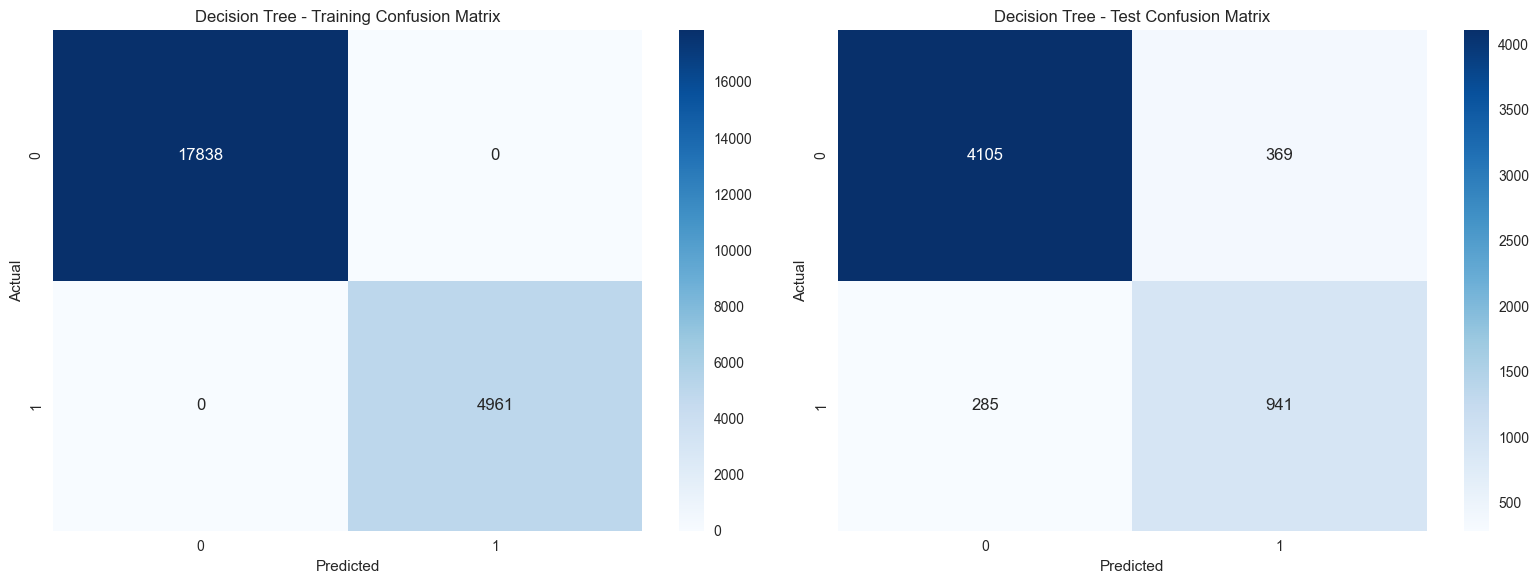


--- XGBoost Results ---
Training Metrics:
Accuracy: 0.9580
Precision: 0.9943
Recall: 0.8117
F1 Score: 0.8938

Test Metrics:
Accuracy: 0.9360
Precision: 0.9556
Recall: 0.7365
F1 Score: 0.8319

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17838
           1       0.99      0.81      0.89      4961

    accuracy                           0.96     22799
   macro avg       0.97      0.91      0.93     22799
weighted avg       0.96      0.96      0.96     22799


Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4474
           1       0.96      0.74      0.83      1226

    accuracy                           0.94      5700
   macro avg       0.94      0.86      0.90      5700
weighted avg       0.94      0.94      0.93      5700


Training Confusion Matrix:
[[17815    23]
 [  934  4027]]

Test Confusion Matrix:
[[4432   

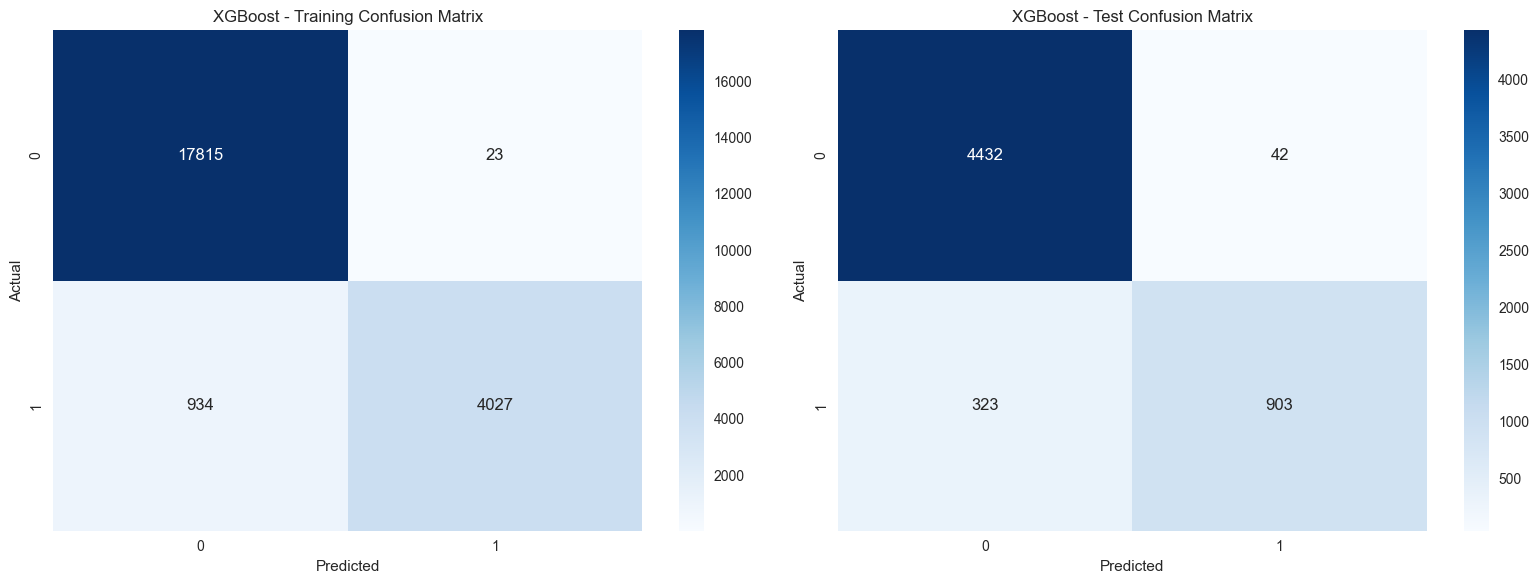


--- Random Forest Results ---
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999

Test Metrics:
Accuracy: 0.9335
Precision: 0.9639
Recall: 0.7178
F1 Score: 0.8228

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17838
           1       1.00      1.00      1.00      4961

    accuracy                           1.00     22799
   macro avg       1.00      1.00      1.00     22799
weighted avg       1.00      1.00      1.00     22799


Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4474
           1       0.96      0.72      0.82      1226

    accuracy                           0.93      5700
   macro avg       0.95      0.86      0.89      5700
weighted avg       0.94      0.93      0.93      5700


Training Confusion Matrix:
[[17838     0]
 [    1  4960]]

Test Confusion Matrix:
[[4

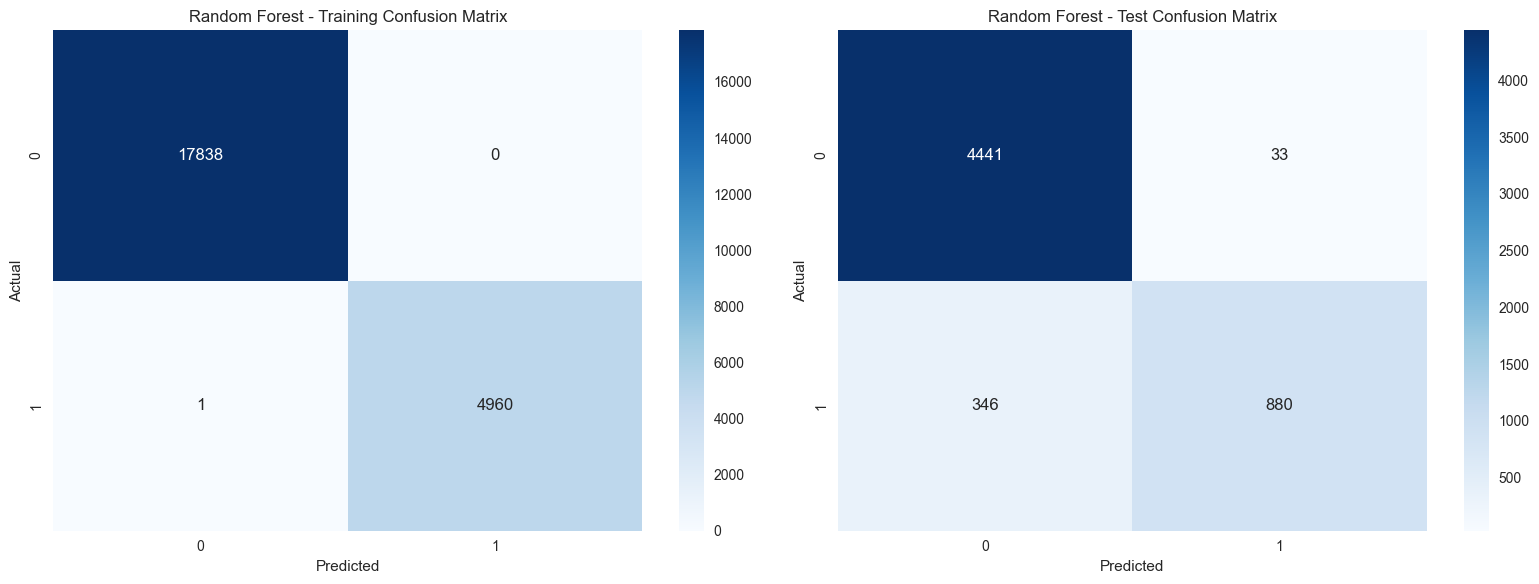

In [83]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


# Create a function to train, evaluate and visualize models
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")

    print(f"\nTest Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")

    # Print classification reports
    print(f"\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print(f"\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Print confusion matrices
    print(f"\nTraining Confusion Matrix:")
    print(train_cm)

    print(f"\nTest Confusion Matrix:")
    print(test_cm)

    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Training confusion matrix
    sns.heatmap(
        train_cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["0", "1"],
        yticklabels=["0", "1"],
        ax=ax1,
    )
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Actual")
    ax1.set_title(f"{model_name} - Training Confusion Matrix")

    # Test confusion matrix
    sns.heatmap(
        test_cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["0", "1"],
        yticklabels=["0", "1"],
        ax=ax2,
    )
    ax2.set_xlabel("Predicted")
    ax2.set_ylabel("Actual")
    ax2.set_title(f"{model_name} - Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


# Initialize the models
decision_tree_model = DecisionTreeClassifier(random_state=1015)
xgboost_model = XGBClassifier(random_state=1015, eval_metric="logloss")
random_forest_model = RandomForestClassifier(random_state=1015)

# Evaluate each model
evaluate_model(decision_tree_model, "Decision Tree", X_train, X_test, y_train, y_test)
evaluate_model(xgboost_model, "XGBoost", X_train, X_test, y_train, y_test)
evaluate_model(random_forest_model, "Random Forest", X_train, X_test, y_train, y_test)

### 2.3 Applying SHAP to XGBOOST 

SHAP (SHapley Additive exPlanations) provides a principled way to interpret machine learning models by assigning each feature a contribution value for individual predictions, based on game theory. 

- In this code, summary_plot (bar) shows which features have the greatest average impact across all predictions, while the default summary_plot (dot) reveals how feature values (high vs. low) influence predictions.

- The waterfall plot breaks down one prediction, showing how each feature nudges the output up or down from the model's baseline. 

- Finally, the scatter plots (dependence plots) highlight how individual feature values affect their SHAP contributions, revealing trends and potential interactions.


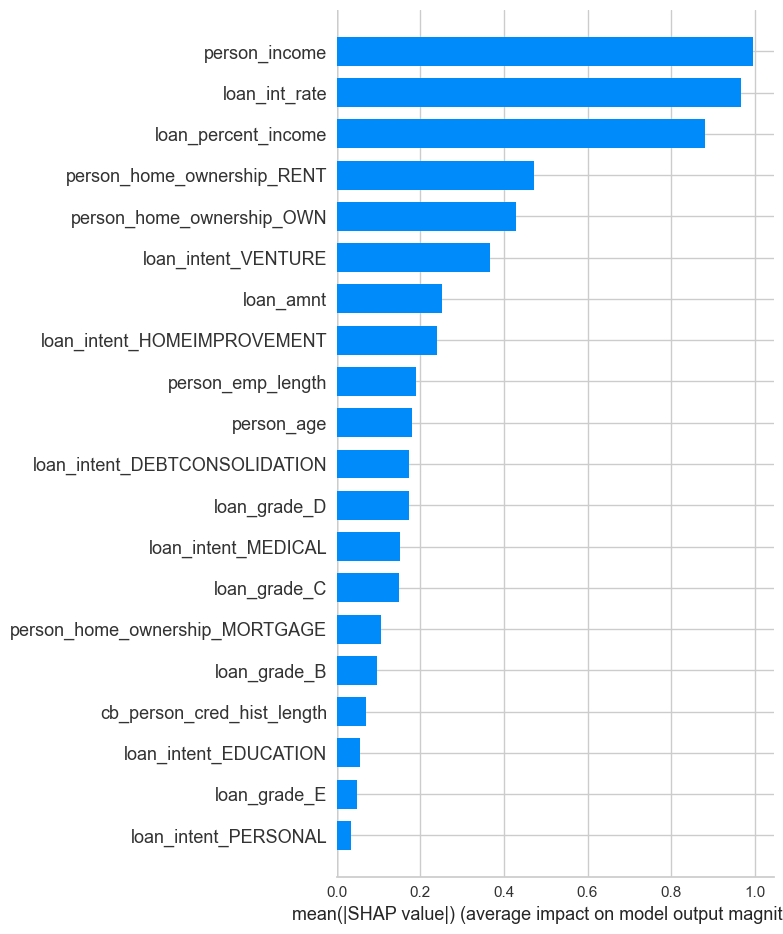

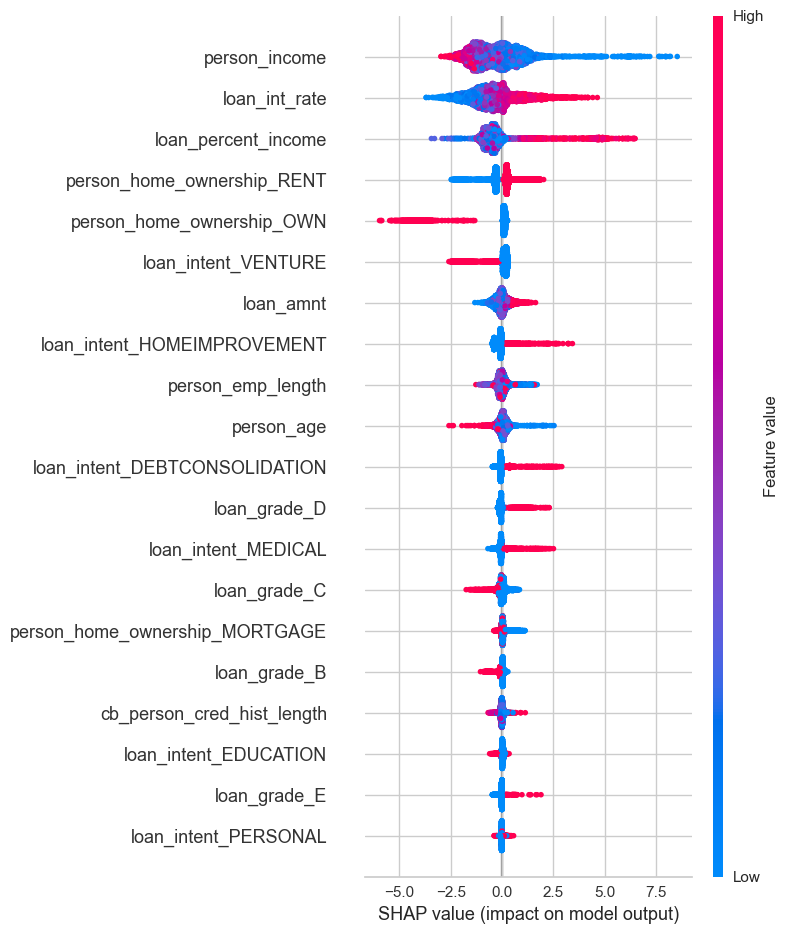

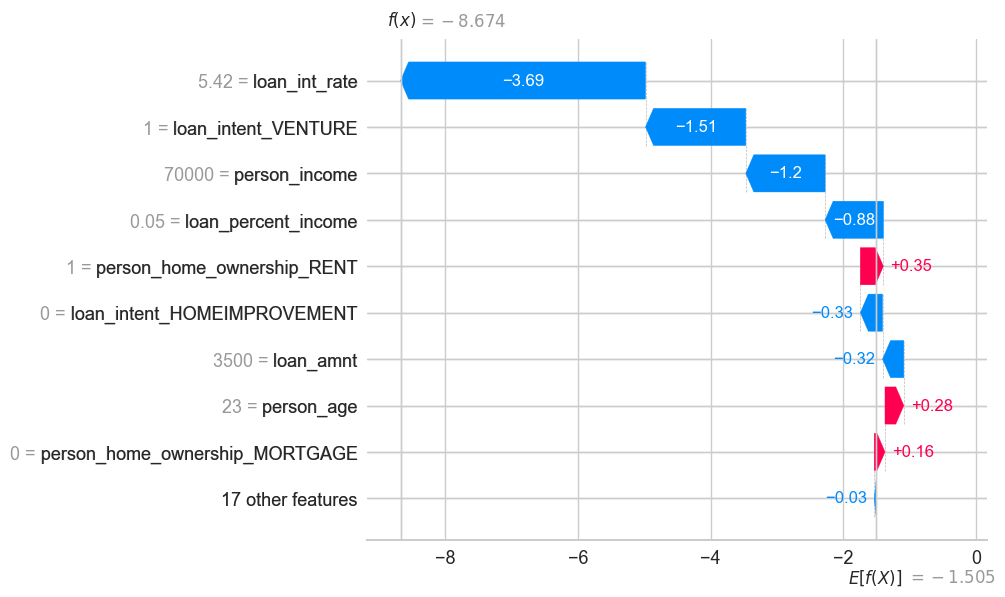

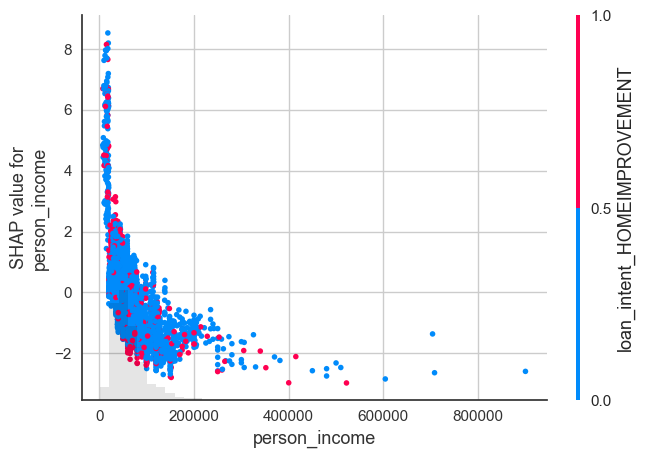

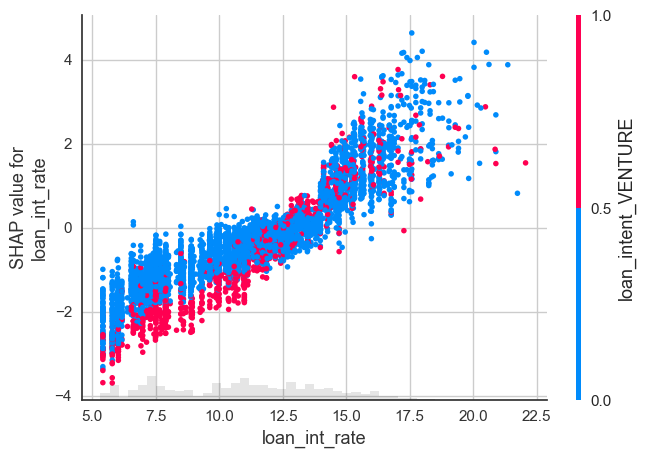

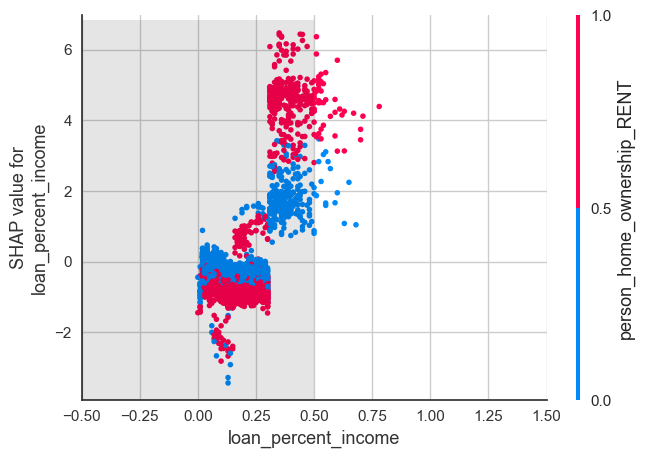

In [84]:
import shap

# SHAP Analysis
# Create a SHAP explainer object
explainer = shap.Explainer(xgboost_model)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# SHAP force plot for a specific prediction (e.g., first test instance)
shap.plots.waterfall(shap_values[0])

# SHAP dependence plots for top features
# Get feature names (adjust this if your X_test doesn't have column names)
feature_names = (
    X_test.columns
    if hasattr(X_test, "columns")
    else [f"feature_{i}" for i in range(X_test.shape[1])]
)

# Plot dependence plots for top 3 features based on mean absolute SHAP values
top_features_idx = np.argsort(-np.abs(shap_values.values).mean(0))[:3]
for idx in top_features_idx:
    shap.plots.scatter(shap_values[:, idx], color=shap_values)